In [3]:
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Data processing and analysis
import numpy as np
import pandas as pd
import math 
import re #it is used for reading text based on some regular expression 

In [5]:
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #for that we need to intall package by below code
#conda install -c conda-forge/label/gcc7 missingno    in anconda prompt 

In [6]:
# Configure visualisations
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)


In [7]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb#  for this i have to install package  "  !pip install lightgbm "
import xgboost as xgb



In [8]:
#!pip install lightgbm

In [9]:
# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale, LabelEncoder, OneHotEncoder

In [10]:
# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [11]:
# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score 




In [12]:
train=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\classification model with pipeline\train.csv")
test=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\classification model with pipeline\test.csv")
IDtest = test['PassengerId']

# 3. Data Exploration

### 3.1 Explore the training set 

#### View shape of training set

In [13]:
print('The shape of the training set : {} '.format(train.shape))

The shape of the training set : (891, 12) 


#### View profile report of training set

In [14]:
import pandas_profiling as pp

In [15]:
#pip install pandas-profiling  on anaconda prompt 



In [16]:
pp.ProfileReport(train)

#### Preview training set

In [18]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [19]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

#### View concise summary of training set

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### It seems that several of the variables - Age, Cabin and Embarked contain missing values. Let's check it.

### Print variables containing missing values

In [21]:
var1 = [col for col in train.columns if train[col].isnull().sum() != 0]

print(train[var1].isnull().sum())

Age         177
Cabin       687
Embarked      2
dtype: int64


#### So, we are right that Age, Cabin and Embarked contain missing values.

### View statistical properties of training set

In [22]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Types of Variables

Now, we will classify the variables into categorical and numerical variables.

In [24]:
# find categorical variables

categorical = [var for var in train.columns if train[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables in training set.

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [25]:
# find numerical variables

numerical = [var for var in train.columns if train[var].dtype !='O']

print('There are {} numerical variables in training set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables in training set.

The numerical variables are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### 3.2 Explore the test set ¶

### View shape of test set

In [26]:
print('The shape of the test set : {} '.format(test.shape))

The shape of the test set : (418, 11) 


#### View profile report of test set

In [27]:
pp.ProfileReport(test)

### Preview test set

In [28]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

#### View concise summary of test set

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Print variables containing missing values

In [30]:
var2 = [col for col in test.columns if test[col].isnull().sum() != 0]

print(test[var2].isnull().sum())

Age       86
Fare       1
Cabin    327
dtype: int64


#### So, we are right that Age, Cabin and Embarked contain missing values.

### View statistical properties of test set

In [32]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

# Types of Variables

###### Now, we will classify the variables into categorical and numerical variables.

In [33]:
# find categorical variables

categorical = [var for var in test.columns if test[var].dtype =='O']

print('There are {} categorical variables in test set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables in test set.

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [34]:
# find numerical variables

numerical = [var for var in test.columns if test[var].dtype !='O']

print('There are {} numerical variables in test set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables in test set.

The numerical variables are : ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### Observations about dataset

## 4. Data Visualization

### 4.1 Missing values 

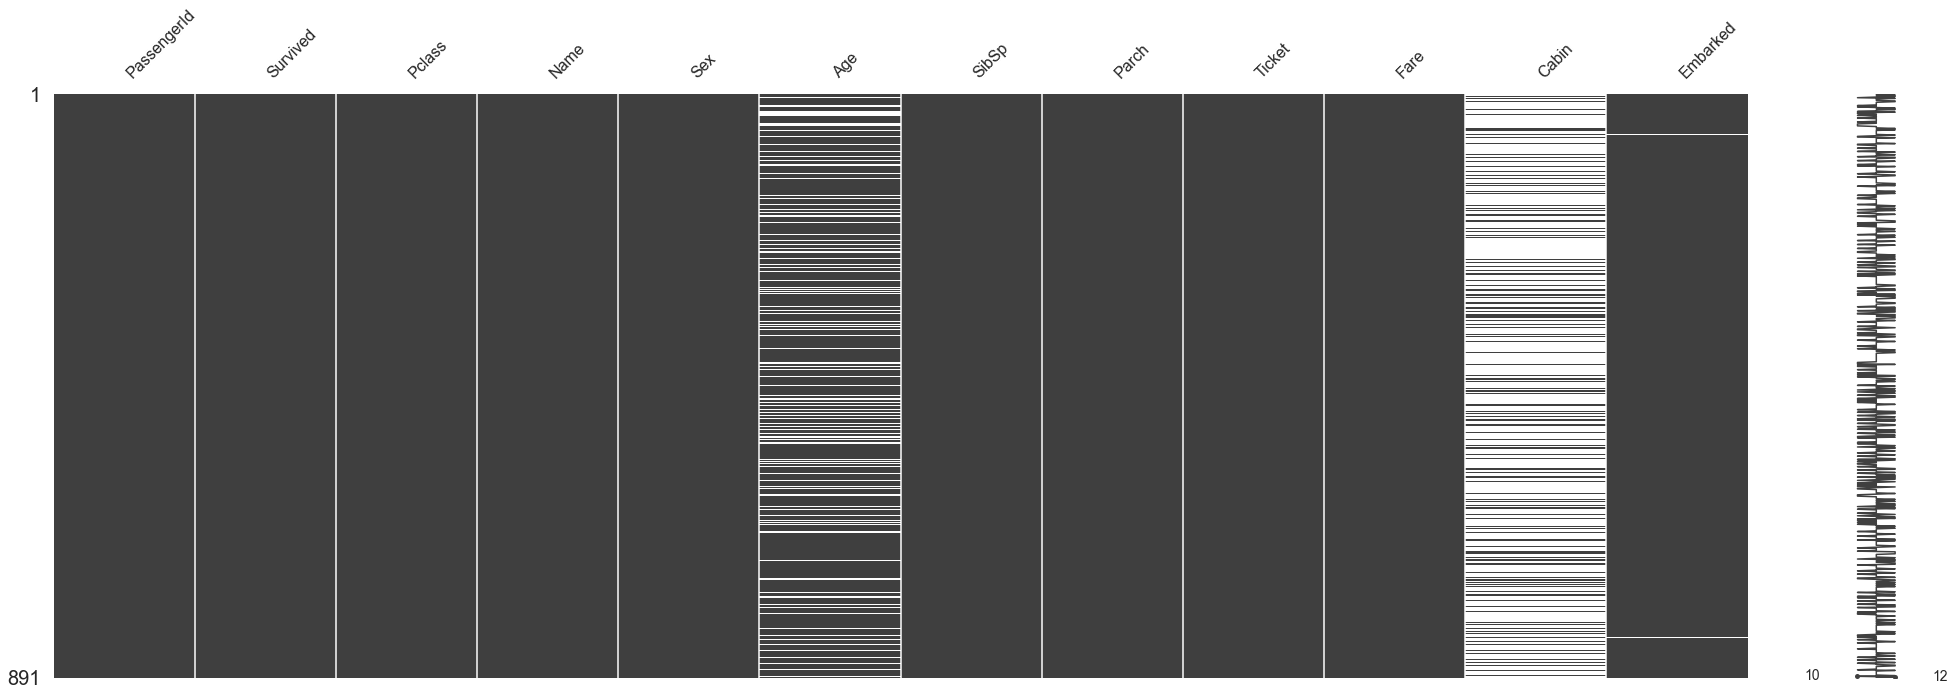

In [35]:
# view missing values in training set
msno.matrix(train, figsize = (30,10))

so it shows that in age , cabin ,embarked has missing  values 

# 4.2 Survived 

In [36]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Here 0 stands for not survived and 1 stands for survived.

##### So, 549 people survived and 342 people did not survive.

##### Let's visualize it by plotting.

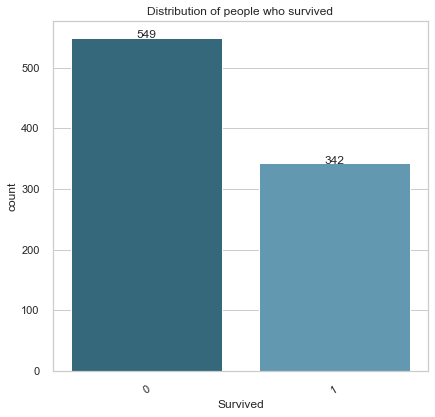

In [37]:
fig, ax1 = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax1,x=train['Survived'], data = train, palette = 'PuBuGn_d')
graph.set_title('Distribution of people who survived', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

##### Now females have higher probability of survival than males.
##### Let' check it

In [38]:
train.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

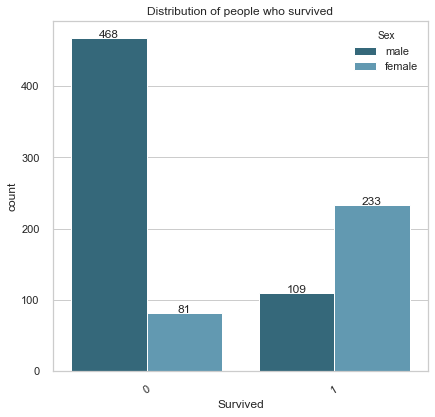

In [39]:
fig, ax1 = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax1,x=train['Survived'], data = train, hue='Sex', palette = 'PuBuGn_d')
graph.set_title('Distribution of people who survived', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

##### Let's check the percentage of survival for males and females separately.

In [40]:
females = train[train['Sex'] == 'female']
females.head()

PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [41]:
females['Survived'].value_counts()/len(females)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [42]:
males = train[train['Sex'] == 'male']
males.head()

PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S

In [43]:
males['Survived'].value_counts()/len(males)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

###### As expected females have higher probability of survival (value 1) 74.20% than males 18.89%.


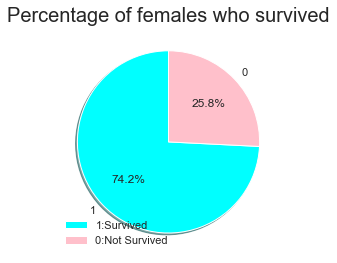

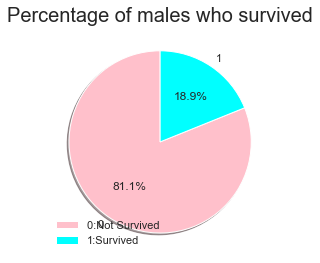

In [44]:
# create the first of two pie-charts and set current axis
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)   # (rows, columns, panel number)
labels1 = females['Survived'].value_counts().index
size1 = females['Survived'].value_counts()
colors1=['cyan','pink']
plt.pie(size1, labels = labels1, colors = colors1, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Percentage of females who survived', fontsize = 20)
plt.legend(['1:Survived', '0:Not Survived'], loc=0)
plt.show()

# create the second of two pie-charts and set current axis
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 2)   # (rows, columns, panel number)
labels2 = males['Survived'].value_counts().index
size2 = males['Survived'].value_counts()
colors2=['pink','cyan']
plt.pie(size2, labels = labels2, colors = colors2, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Percentage of males who survived', fontsize = 20)
plt.legend(['0:Not Survived','1:Survived'])
plt.show()


###### From the above pie-charts, we can deduce that females probability of survival is 74.2% (cyan color) while males probability of survival is 18.9% (cyan color).


## 4.3 Sex

In [45]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

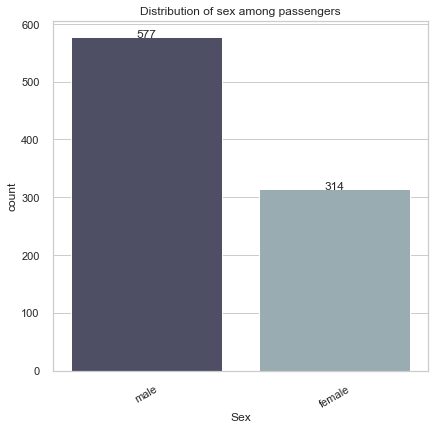

In [46]:
fig, ax1 = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax1,x=train['Sex'], data=train, palette = 'bone')
graph.set_title('Distribution of sex among passengers', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


In [47]:
train['Sex'].value_counts()/len(train)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

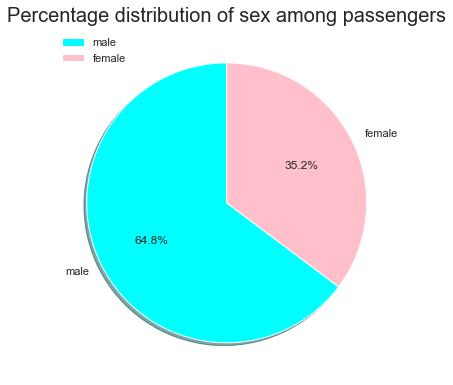

In [48]:
plt.figure(figsize=(8,6))
labels = train['Sex'].value_counts().index
size = train['Sex'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, shadow = True, colors=colors, autopct='%1.1f%%',startangle = 90)
plt.title('Percentage distribution of sex among passengers', fontsize = 20)
plt.legend()
plt.show()


In [49]:
train.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

### 4.4 Pclass 

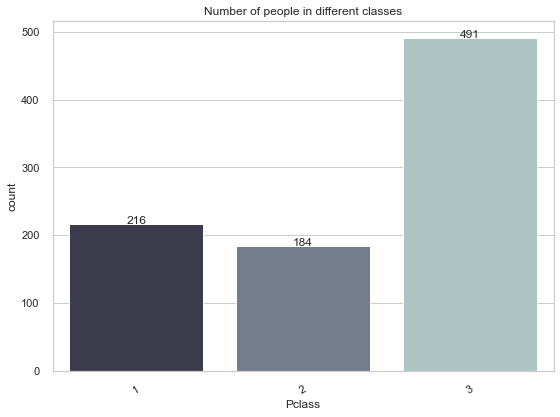

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Pclass'], data=train, palette = 'bone')
graph.set_title('Number of people in different classes', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

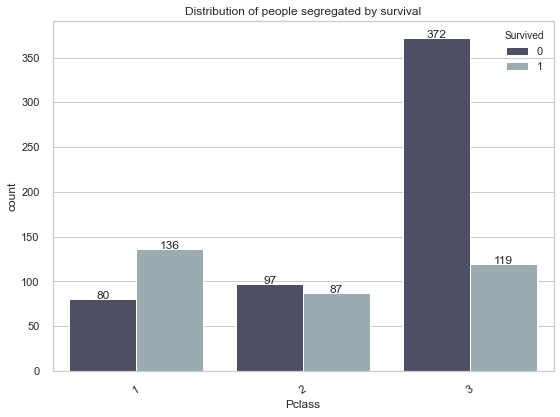

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Pclass'], data=train, hue='Survived', palette = 'bone')
graph.set_title('Distribution of people segregated by survival', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

###### Here 0 stands for not survived and 1 stands for survived.

###### So, we can see that Pclass plays a major role in survival.

###### Majority of people survived in Pclass 1 while a large number of people do not survive in Pclass 3.



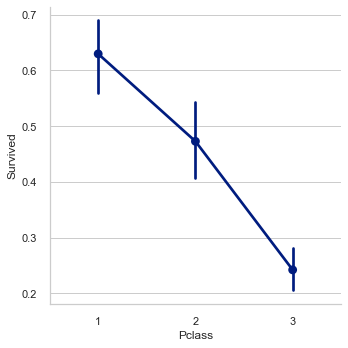

In [52]:
# percentage of survivors per class
sns.factorplot('Pclass', 'Survived', data = train)

###### The above plot indicates the percentage of survivors per class.

## 4.5 Embarked

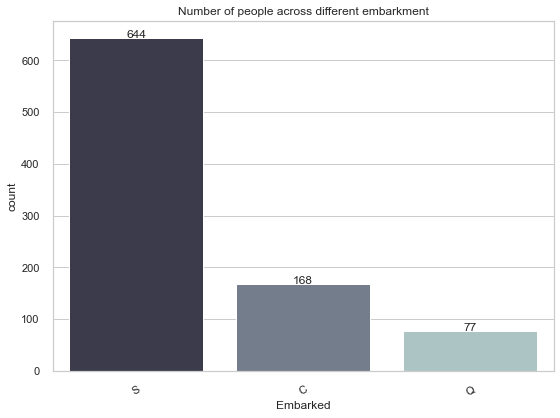

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Embarked'], data=train, palette = 'bone')
graph.set_title('Number of people across different embarkment', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

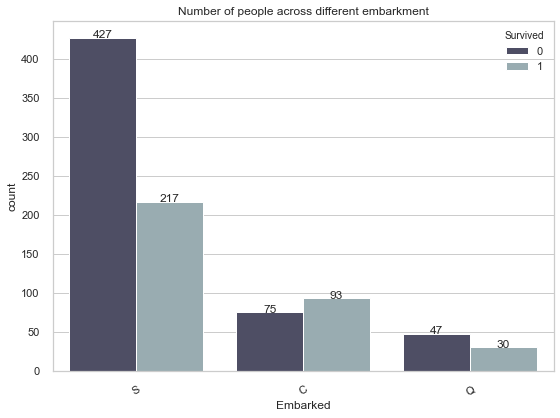

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train['Embarked'], data=train, hue='Survived', palette = 'bone')
graph.set_title('Number of people across different embarkment', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

###### We can see that port of embarkment plays a major role in survival probability.

## 4.6 Age

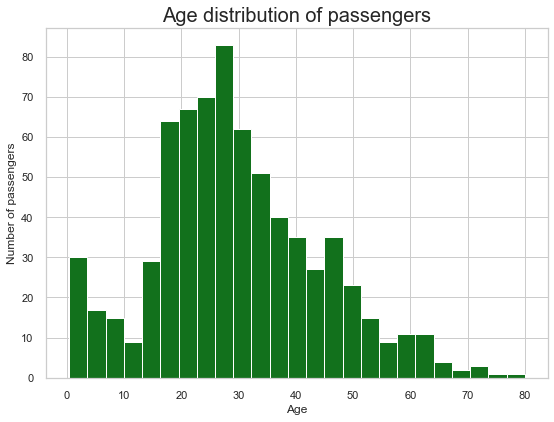

In [55]:
x = train['Age']
plt.figure(figsize=(8,6))
plt.hist(x, bins=25, color='g')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age distribution of passengers', fontsize = 20)
plt.show()


##### We can see that majority of passengers are aged between 20 and 40.

###### We will again visit this data visualization section in Feature Engineering section.


# 5. Data Preprocessing 

## 5.1 Remove redundant features

The Ticket and PassengerId are redundant features. So, we will remove them from the dataset.

In [56]:
train.drop(['Ticket', 'PassengerId'], axis = 1, inplace = True)
test.drop(['Ticket','PassengerId'], axis = 1, inplace = True)

## 5.2 Imputation of missing values in Age

We will make additional column with the title of the person (Mr, Mrs, Miss, etc).

Then, we impute the missing values in age with the median age for each title.

Let's first make a function to extract title from Name feature.

In [57]:
# function to extract title from Name feature
def passenger_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

In [58]:
# extract title  
train['Title'] = train['Name'].apply(passenger_title)
test['Title'] = test['Name'].apply(passenger_title)

In [60]:
# fill missing age, with median from title segregation: funtion
def fill_age(passenger):
    
    # determine age by group 
    temp = train.groupby(train.Title).median()
    
    age, title = passenger
    
    if age == age:
        return age
    else:
        if title == 'Mr':
            return temp.Age['Mr']
        elif title == 'Miss':
            return temp.Age['Miss']
        elif title == ['Mrs']:
            return temp.Age['Mrs']
        elif title == 'Master':
            return temp.Age['Master']
        else:
            return temp.Age['Other']
        

In [61]:
# fill age according to title
train['Age'] = train[['Age', 'Title']].apply(fill_age, axis = 1)
test['Age'] = test[['Age', 'Title']].apply(fill_age, axis = 1)
# Remove column Name, it is not us

In [62]:
# Remove column Name, it is not useful for predictions and we extracted the title already
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [63]:
# Remove column Title, it is not useful for predictions and we imputed the age already
train.drop('Title', axis = 1, inplace = True)
test.drop('Title', axis = 1, inplace = True)


## 5.3 Imputation of missing values in Cabin

To extract missing values in Cabin, we extract Deck from Cabin and add 'Unknown' where NA.

In [64]:
def isNaN(num):
    return num != num # checks if cell is NaN

In [65]:
# get the first letter of cabin 
def first_letter_of_cabin(cabin):
    if not isNaN(cabin):
        return cabin[0]
    else:
        return 'Unknown'

In [66]:
train['Deck'] = train['Cabin'].apply(first_letter_of_cabin)
test['Deck'] = test['Cabin'].apply(first_letter_of_cabin)


In [67]:
# drop old variable Cabin
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)


## 5.4 Imputation of missing values in Embarked ¶

We impute Embarked with the most frequent port (S).

In [68]:
train["Embarked"].fillna("S", inplace = True)
test['Embarked'].fillna("S", inplace = True)

 Let's again check for missing values

In [69]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [70]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Deck        0
dtype: int64

In [71]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [72]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

## 5.5 Outlier Detection

The Age and Fare variable contain putliers. Now, let's check for outliers in Age and Fare.

Let's draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'Fare')

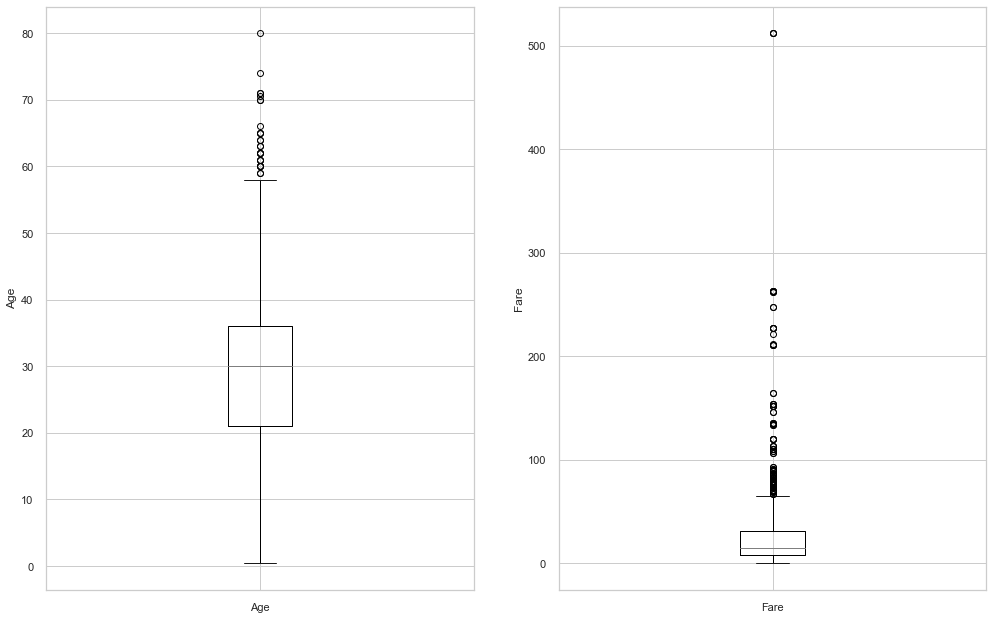

In [73]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(1, 2, 1)
fig = train.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(1, 2, 2)
fig = train.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

In [74]:
# find outliers in Age variable

IQR = train.Age.quantile(0.75) - train.Age.quantile(0.25)
Lower_fence = train.Age.quantile(0.25) - (IQR * 3)
Upper_fence = train.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=max(0, Lower_fence), upperboundary=Upper_fence))

Age outliers are values < 0 or > 81.0


In [75]:
# find outliers in Fare variable

IQR = train.Fare.quantile(0.75) - train.Fare.quantile(0.25)
Lower_fence = train.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = train.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=max(0, Lower_fence), upperboundary=Upper_fence))

Fare outliers are values < 0 or > 100.2688


###### Since, Age and Fare do not have values less than 0. So, we assume their minimum values to be 0.

###### I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [76]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [train, test]:
    df['Age'] = max_value(df, 'Age', 81.0)
    df['Fare'] = max_value(df, 'Fare', 100.2688)

Let's check that the above variables are capped at their maximum values.

In [77]:
train.Age.max(), test.Age.max()

(80.0, 76.0)

In [78]:
train.Fare.max(), test.Fare.max()

(100.2688, 100.2688)

# 6. Feature Engineering 

In this section, we will make additional columns for future analysis.

## 6.1 Categorize passengers as male, female or child

Children have much larger probability of survival than men or women. So, we will categorize the passengers as men, women or child.

In [79]:
# label minors as child, and remaining people as female or male
def male_female_child(passenger):
    # take the age and sex
    age, sex = passenger
    
    # compare age, return child if under 16, otherwise leave sex
    if age < 16:
        return 'child'
    else:
        return sex

In [80]:
# new columns called person specifying if the person was female, male or child
train['Person'] = train[['Age', 'Sex']].apply(male_female_child, axis = 1)
test['Person'] = test[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [81]:
# Number of male, female and children on board
train['Person'].value_counts()

male      533
female    271
child      87
Name: Person, dtype: int64

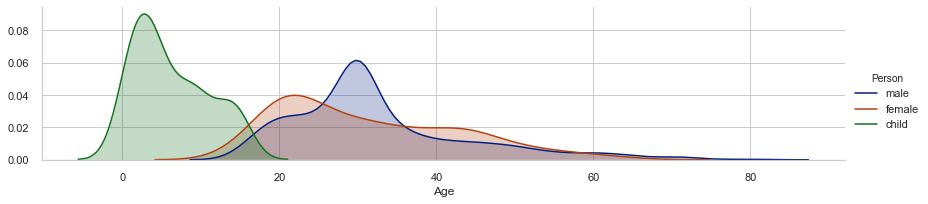

In [82]:
# age segregated by class
fig = sns.FacetGrid(train, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

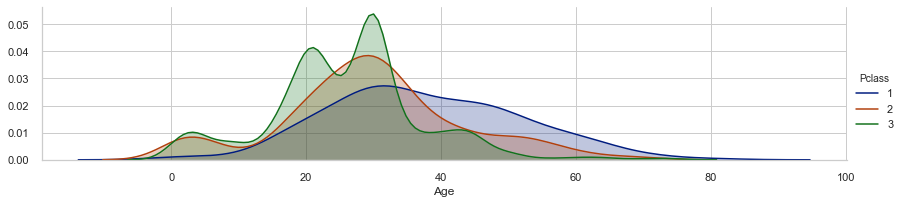

In [83]:
# age segregated by class
fig = sns.FacetGrid(train, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

We can see that the peak over 0 age for classes 2 and 3, coincides with the classes that had children. Class 1 did not have a lot of children, unsurprisingly. Note also, that older people were high class.


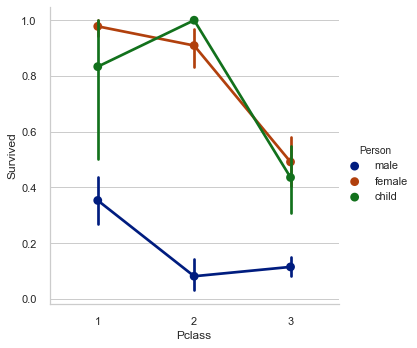

In [84]:
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = train)

We can see that males have lower probability of survival than females and children, regardless of the class they were in.
As for women and children, being in class 3 meant that their chances of survival were lower.


## 6.2 Make additional variable : travel alone

In [85]:
def travel_alone(df):
    df['Alone'] = df.Parch + df.SibSp
    df['Alone'].loc[df['Alone'] > 0] = 'With Family'
    df['Alone'].loc[df['Alone'] == 0] = 'Alone'
    
    return df

0 indicates that person is travelling with family and 1 indicates that he is travelling alone.

In [86]:
train = travel_alone(train)
test = travel_alone(test)

In [87]:
# check how many passengers are travelling with family and alone
train['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

So, 537 people are travelling alone and 354 people are travelling with family.

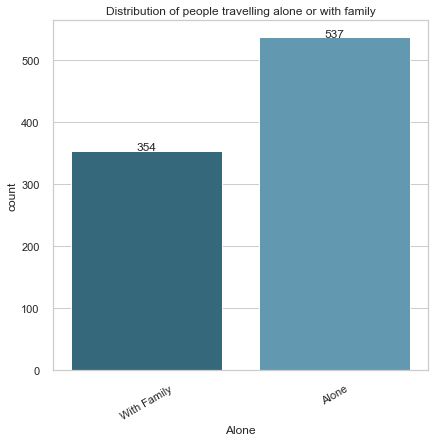

In [88]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train['Alone'], data = train, palette = 'PuBuGn_d')
graph.set_title('Distribution of people travelling alone or with family', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


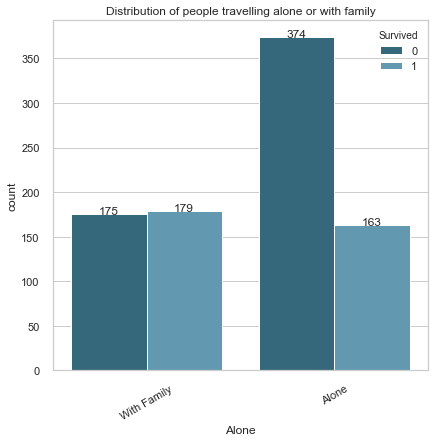

In [89]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train['Alone'], data = train, hue = 'Survived', palette = 'PuBuGn_d')
graph.set_title('Distribution of people travelling alone or with family', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

We can see that almost half number of people who are travelling with family survived whereas large number of people travelling alone did not survive.

So, travelling alone or with family plays a major role in deciding the survival probability.

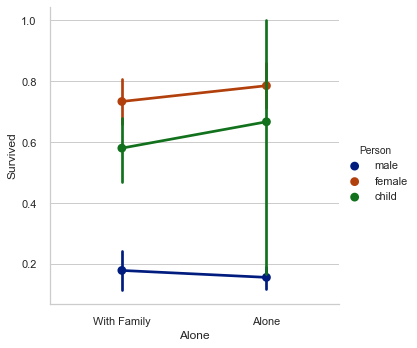

In [90]:
# percentage of survivors depending on traveling alone or with family
sns.factorplot('Alone', 'Survived', hue = 'Person', data = train)

In [91]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked     Deck  \
0         0       3    male  22.0      1      0   7.2500        S  Unknown   
1         1       1  female  38.0      1      0  71.2833        C        C   
2         1       3  female  26.0      0      0   7.9250        S  Unknown   
3         1       1  female  35.0      1      0  53.1000        S        C   
4         0       3    male  35.0      0      0   8.0500        S  Unknown   

   Person        Alone  
0    male  With Family  
1  female  With Family  
2  female        Alone  
3  female  With Family  
4    male        Alone

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


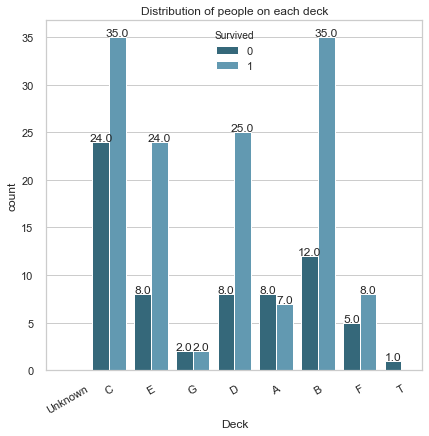

In [92]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train['Deck'], data = train[train.Deck != 'Unknown'], hue = 'Survived', palette = 'PuBuGn_d')
graph.set_title('Distribution of people on each deck', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

The people who are on deck C and B have larger probability of survival.

## 6.3 Correlation of features with target

In [93]:
train.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.066309
SibSp      -0.035322
Parch       0.081629
Fare        0.318097
Name: Survived, dtype: float64

We can see that Survived is negatively correlated with Pclass,Age,SibSp,Embarked,Deck,Person,Alone and positively correlated with Parch and Fare.

We can also plot a heatmap to visualize the relationship between features.

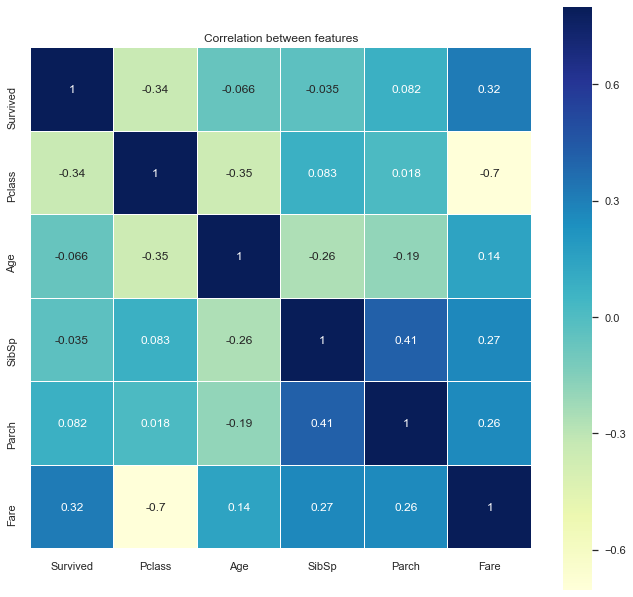

In [94]:
corr=train.corr()#["Survived"]
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')
plt.show()

# 7. Categorical Variable Encoding

Now, let's take a look at train and test set.

In [95]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked     Deck  \
0         0       3    male  22.0      1      0   7.2500        S  Unknown   
1         1       1  female  38.0      1      0  71.2833        C        C   
2         1       3  female  26.0      0      0   7.9250        S  Unknown   
3         1       1  female  35.0      1      0  53.1000        S        C   
4         0       3    male  35.0      0      0   8.0500        S  Unknown   

   Person        Alone  
0    male  With Family  
1  female  With Family  
2  female        Alone  
3  female  With Family  
4    male        Alone

Drop the Sex variable.

In [97]:
train.drop('Sex', axis=1, inplace=True)
test.drop('Sex', axis=1, inplace=True)

There are 4 variables that need to be categorical encoded.

They are Embarked,Deck,Person and Alone

In [98]:
train['Alone'] = pd.get_dummies(train['Alone'])
test['Alone'] = pd.get_dummies(test['Alone'])


In [99]:
labelenc=LabelEncoder()

categorical=['Embarked','Deck','Person']
for col in categorical:
    train[col]=labelenc.fit_transform(train[col])
    test[col]=labelenc.fit_transform(test[col])

train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Embarked  Deck  Person  \
0         0       3  22.0      1      0   7.2500         2     8       2   
1         1       1  38.0      1      0  71.2833         0     2       1   
2         1       3  26.0      0      0   7.9250         2     8       1   
3         1       1  35.0      1      0  53.1000         2     2       1   
4         0       3  35.0      0      0   8.0500         2     8       2   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [100]:
test.head()

Pclass   Age  SibSp  Parch     Fare  Embarked  Deck  Person  Alone
0       3  34.5      0      0   7.8292         1     7       2      1
1       3  47.0      1      0   7.0000         2     7       1      0
2       2  62.0      0      0   9.6875         1     7       2      1
3       3  27.0      0      0   8.6625         2     7       2      1
4       3  22.0      1      1  12.2875         2     7       1      0

# 8. Feature Scaling

We need to do Feature Scaling first before proceeding with modeling.

In [101]:
train_cols = train.columns
test_cols = test.columns

In [102]:
scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

# 9. Modelling

In [105]:
# Declare feature vector and target variable
X = train.drop(labels = ['Survived'],axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 9.1 Predict accuracy with different algorithms

I predict accuracy with 15 popular classifiers and evaluate their performance.

In [106]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM", 
         "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "LDA", "QDA", "Neural Net", "LightGBM", "XGBoost" ]    


In [107]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier(),    
    xgb.XGBClassifier()
   ]

In [108]:
accuracy_scores = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8237
Nearest Neighbors  :  0.7831
Naive Bayes  :  0.7424
Linear SVM  :  0.7864
RBF SVM  :  0.7729
Gaussian Process  :  0.8373
Decision Tree  :  0.8237
Random Forest  :  0.7729
AdaBoost  :  0.8305
Gradient Boosting  :  0.8203
LDA  :  0.8068
QDA  :  0.7763
Neural Net  :  0.8407
LightGBM  :  0.8203
XGBoost  :  0.8


In [109]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

Classifiers  Accuracy Scores
0   Logistic Regression           0.8237
1     Nearest Neighbors           0.7831
2           Naive Bayes           0.7424
3            Linear SVM           0.7864
4               RBF SVM           0.7729
5      Gaussian Process           0.8373
6         Decision Tree           0.8237
7         Random Forest           0.7729
8              AdaBoost           0.8305
9     Gradient Boosting           0.8203
10                  LDA           0.8068
11                  QDA           0.7763
12           Neural Net           0.8407
13             LightGBM           0.8203
14              XGBoost           0.8000

In [110]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

Classifiers  Accuracy Scores
12           Neural Net           0.8407
5      Gaussian Process           0.8373
8              AdaBoost           0.8305
0   Logistic Regression           0.8237
6         Decision Tree           0.8237
9     Gradient Boosting           0.8203
13             LightGBM           0.8203
10                  LDA           0.8068
14              XGBoost           0.8000
3            Linear SVM           0.7864
1     Nearest Neighbors           0.7831
11                  QDA           0.7763
4               RBF SVM           0.7729
7         Random Forest           0.7729
2           Naive Bayes           0.7424

## 9.2 Plot the classifier accuracy scores 

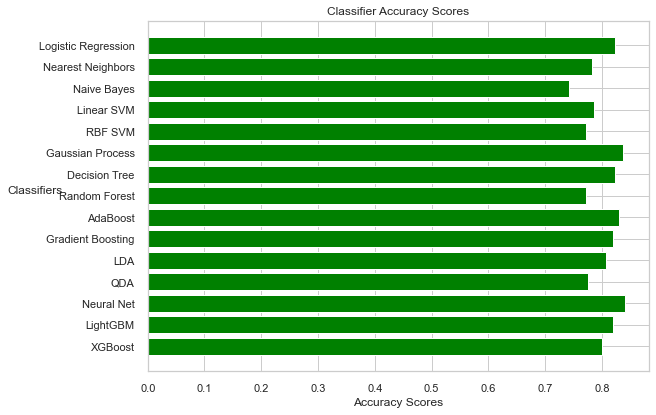

In [111]:
fig, ax = plt.subplots(figsize=(8,6))
x = classifiers_performance['Accuracy Scores']
y = classifiers_performance['Classifiers']
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Scores')
ax.set_ylabel('Classifiers', rotation=0)
ax.set_title('Classifier Accuracy Scores')
plt.show()

# 10. Feature Selection

In this section, we will see how to improve model performance by feature selection.

We will visualize feature importance with random forest classifier and drop the least important feature, rebuild the model and check effect on accuracy.

For a comprehensive overview on feature selection techniques, please see the kernel -

## 10.1 Feature Importance with Random Forest model 

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follows:-

In [112]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores.

In [113]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Person      0.256870
Fare        0.242757
Age         0.193414
Pclass      0.087882
Deck        0.074787
SibSp       0.049450
Embarked    0.043930
Parch       0.034210
Alone       0.016700
dtype: float64

In [114]:
feature_scores.values

array([0.25686976, 0.24275709, 0.19341442, 0.08788205, 0.07478711,
       0.04945003, 0.04392974, 0.03420959, 0.01670021])

In [115]:
feature_scores.index

Index(['Person', 'Fare', 'Age', 'Pclass', 'Deck', 'SibSp', 'Embarked', 'Parch',
       'Alone'],
      dtype='object')

We can see that the most important feature is Person and least important feature is Alone.

## 10.2 Visualize feature scores

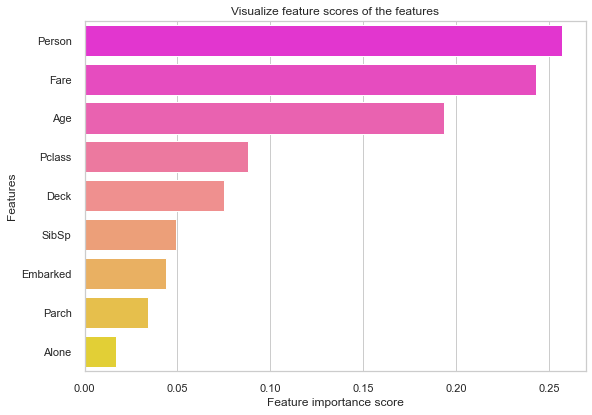

In [116]:
# Creating a seaborn bar plot to visualize feature scores
f, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=feature_scores.values, y=feature_scores.index, palette='spring')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## 10.3 Drop least important feature 

Now, I will drop the least important feature Alone from the model, rebuild the model and check its effect on accuracy.

In [117]:
# drop the least important feature from X_train, X_test and test set for further analysis
X1_train = X_train.drop(['Alone'], axis=1)
X1_test = X_test.drop(['Alone'], axis=1)
test = test.drop(['Alone'], axis=1)

In [118]:
accuracy_scores1 = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X1_train, y_train)
    score = clf.score(X1_test, y_test)
    score = round(score, 4)
    accuracy_scores1.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8169
Nearest Neighbors  :  0.8068
Naive Bayes  :  0.7458
Linear SVM  :  0.7898
RBF SVM  :  0.7729
Gaussian Process  :  0.8441
Decision Tree  :  0.8237
Random Forest  :  0.7864
AdaBoost  :  0.8305
Gradient Boosting  :  0.8237
LDA  :  0.8
QDA  :  0.7864
Neural Net  :  0.8271
LightGBM  :  0.8203
XGBoost  :  0.7932


In [119]:
classifiers_performance1 = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores, 
                                         "Accuracy Scores1": accuracy_scores1})
classifiers_performance1

Classifiers  Accuracy Scores  Accuracy Scores1
0   Logistic Regression           0.8237            0.8169
1     Nearest Neighbors           0.7831            0.8068
2           Naive Bayes           0.7424            0.7458
3            Linear SVM           0.7864            0.7898
4               RBF SVM           0.7729            0.7729
5      Gaussian Process           0.8373            0.8441
6         Decision Tree           0.8237            0.8237
7         Random Forest           0.7729            0.7864
8              AdaBoost           0.8305            0.8305
9     Gradient Boosting           0.8203            0.8237
10                  LDA           0.8068            0.8000
11                  QDA           0.7763            0.7864
12           Neural Net           0.8407            0.8271
13             LightGBM           0.8203            0.8203
14              XGBoost           0.8000            0.7932

###### We can see that Gaussian Process has the maximum accuracy of 0.8441.

###### We will use the Gaussian Process Classifier to plot the confusion-matrix.



# 11. Confusion matrix

In [120]:
# instantiate the XGBoost classifier
gpc_clf = GaussianProcessClassifier(1.0 * RBF(1.0))


# fit the classifier to the modified training set
gpc_clf.fit(X1_train, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

In [121]:
# predict on the test set
y1_pred = gpc_clf.predict(X1_test)

In [122]:
# print the accuracy
print('Gaussian Process Classifier model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y1_pred)))

Gaussian Process Classifier model accuracy score: 0.8441


In [123]:
# print confusion-matrix

cm = confusion_matrix(y_test, y1_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[156  19]
 [ 27  93]]

True Positives(TP) =  156

True Negatives(TN) =  93

False Positives(FP) =  19

False Negatives(FN) =  27


The confusion matrix shows 156 + 93 = 249 correct predictions and 19 + 27 = 46 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 156

True Negatives (Actual Negative:0 and Predict Negative:0) - 93

False Positives (Actual Negative:0 but Predict Positive:1) - 19 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 27 (Type II error)

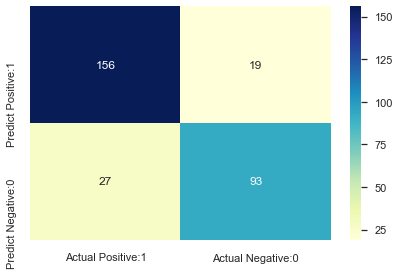

In [125]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 12. Classification Metrices

## 12.1 Classification Report

Classification Report is another way to evaluate the classification model performance.

It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [126]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       175
           1       0.83      0.78      0.80       120

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295



## 12.2 Classification Accuracy

In [127]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [128]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8441


## 12.3 Classification Error 

In [129]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1559


## 12.4 Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [130]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8914


## 12.5 Recall 

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).

Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, Recall can be given as the ratio of TP to (TP + FN).

In [131]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Recall or Sensitivity : 0.8525


## 12.6 True Positive Rate

True Positive Rate is synonymous with Recall.

In [132]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8525


## 12.7 False Positive Rate

In [133]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1696


## 12.8 Specificity (True Negative Rate) 

Specificity is also called True Negative Rate

In [134]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8304


## 12.9 f1-score

f1-score is the weighted harmonic mean of precision and recall.

The best possible f1-score would be 1.0 and the worst would be 0.0.

f1-score is the harmonic mean of precision and recall.

So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.

The weighted average of f1-score should be used to compare classifier models, not global accuracy.

## 12.10 Support 

Support is the actual number of occurrences of the class in our dataset.

# 13. Cross Validation

In [135]:
# iterate over classifiers and calculate cross-validation score
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X1_train, y_train, cv = 10, scoring='accuracy')
    print(name , ':{:.4f}'.format(scores.mean()))

Logistic Regression :0.8055
Nearest Neighbors :0.7703
Naive Bayes :0.7297
Linear SVM :0.7668
RBF SVM :0.7853
Gaussian Process :0.8170
Decision Tree :0.7919
Random Forest :0.7937
AdaBoost :0.8088
Gradient Boosting :0.8289
LDA :0.7869
QDA :0.7448
Neural Net :0.8070
LightGBM :0.8189
XGBoost :0.7954


# 14. Hyperparameter Optimization using GridSearch CV

I choose the top 3 classifiers with maximum accuracy for ensemble modeling.

They are AdaBoost, LightGBM and Gradient Boosting.

So, we will tune the hyperparameters of these models before proceeding.

### AdaBoost Classifier Parameters tuning

In [136]:
abc_params = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

dtc_clf = DecisionTreeClassifier(random_state = 0, max_features = "auto", class_weight = "balanced", max_depth = None)

abc_clf = AdaBoostClassifier(base_estimator = dtc_clf)


abc_grid_search = GridSearchCV(estimator = abc_clf,  
                               param_grid = abc_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)

abc_grid_search.fit(X1_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_l

In [137]:
# examine the best model

# best score achieved during the GridSearchCV
print('AdaBoost GridSearch CV best score : {:.4f}\n\n'.format(abc_grid_search.best_score_))

# print parameters that give the best results
print('AdaBoost Parameters that give the best results :','\n\n', (abc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
abc_best = abc_grid_search.best_estimator_
print('\n\nXGBoost Estimator that was chosen by the search :','\n\n', (abc_best))


AdaBoost GridSearch CV best score : 0.7786


AdaBoost Parameters that give the best results : 

 {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 2}


XGBoost Estimator that was chosen by the search : 

 AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
        

# LightGBM Parameters tuning¶

In [139]:
lgb_clf = lgb.LGBMClassifier()


lgb_params={'learning_rate': [0.005],
    'num_leaves': [6,8,12,16],
    'objective' : ['binary'],
    'colsample_bytree' : [0.5, 0.6],
    'subsample' : [0.65,0.66],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }


lgb_grid_search = GridSearchCV(estimator = lgb_clf,  
                               param_grid = lgb_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


lgb_grid_search.fit(X1_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.6],
                         'learning_ra

In [140]:
# examine the best model

# best score achieved during the GridSearchCV
print('LightGBM GridSearch CV best score : {:.4f}\n\n'.format(lgb_grid_search.best_score_))

# print parameters that give the best results
print('LightGBM Parameters that give the best results :','\n\n', (lgb_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
lgb_best = lgb_grid_search.best_estimator_
print('\n\nLightGBM Estimator that was chosen by the search :','\n\n', (lgb_best))

LightGBM GridSearch CV best score : 0.7517


LightGBM Parameters that give the best results : 

 {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'num_leaves': 12, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.65}


LightGBM Estimator that was chosen by the search : 

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=12, objective='binary',
               random_state=None, reg_alpha=1, reg_lambda=1, silent=True,
               subsample=0.65, subsample_for_bin=200000, subsample_freq=0)


# Gradient Boost Parameters tuning

In [141]:
gbc_clf = GradientBoostingClassifier()

gbc_params = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gbc_grid_search = GridSearchCV(estimator = gbc_clf, 
                               param_grid = gbc_params, 
                               scoring = "accuracy", 
                               cv = 5,
                               verbose = 0)

gbc_grid_search.fit(X1_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [142]:
# examine the best model

# best score achieved during the GridSearchCV
print('Gradient Boosting GridSearch CV best score : {:.4f}\n\n'.format(gbc_grid_search.best_score_))

# print parameters that give the best results
print('Gradient Boosting Parameters that give the best results :','\n\n', (gbc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
gbc_best = gbc_grid_search.best_estimator_
print('\n\nGradient Boosting Estimator that was chosen by the search :','\n\n', (gbc_best))

Gradient Boosting GridSearch CV best score : 0.8289


Gradient Boosting Parameters that give the best results : 

 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 100, 'n_estimators': 300}


Gradient Boosting Estimator that was chosen by the search : 

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=Fal

# 15. Ensemble Modeling

I decided to choose a voting classifier to combine the predictions coming from the above 3 classifiers.

In [143]:
votingC = VotingClassifier(estimators=[('abc', abc_best), ('lgb',lgb_best), ('gbc',gbc_best)], voting='soft')

votingC = votingC.fit(X1_train, y_train)

# 16. Submission

In [144]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

submission = pd.concat([IDtest,test_Survived],axis=1)


submission.to_csv("titanic_submission.csv", index=False)


# 17. Conclusion 

In this notebook, we have build a classification model on the famous titanic dataset.

We have used a voting ensemble classifier for making predictions.